# **Section 1.1 Relevant Libraries**

---
Required Libraries are called in this section


In [2]:
#import all the libraries here
import pandas as pd
import os
import json
import numpy as np
from textstat.textstat import textstat
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
import time
from scipy.spatial.distance import cityblock
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cluster import KMeans
import nltk
import statistics
from sklearn.cluster import AgglomerativeClustering


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# **Section 1.2 Reading the Dataset**

---

The function retrieve() retrieves the values from the given dataset and the location of dataset is in variable *TRAINING_DIR* and *TESTING_DIR*. Variable *df_train* contains trainng data from the dataset and *df_test* contains test data from the dataset.
Second option is reading the csv file already in the data folder file with all data and features.

In [70]:
TRAINING_DIR = '.\\data\\train\\dataset-wide'#change the path here
TESTING_DIR='.\\data\\validation\\dataset-wide'

In [71]:
def retrieve(folder_name):
    x = []
    y = []
    file_names = []
    positions =[]
    authors=[]
    i=0
    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = file[:-4]
            
            file_text = open(os.path.join(folder_name, file_name) + '.txt', encoding='utf8')
            try:
                file_truth = open(os.path.join(folder_name,'truth-' + file_name +'.json'), encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['multi-author']
                    truth_positions = truth['changes']
                    truth_author=truth['authors']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    authors.append(truth_author)
                    file_names.append(file[:-4])
                    i+=1
                    print("The text number is "+str(i))
                finally:
                    file_truth.close()
            finally:
                file_text.close()
       # print("The text number is"+str(i+1) )

    return x, y, file_names,positions,authors

In [72]:
X, y,file_names,pos,auth = retrieve(TRAINING_DIR)
    
df_train = pd.DataFrame(data={'text': X, 'multiple_Author': y, 'filename': file_names,'Position': pos,'Number_of_authors':auth})

X, y,file_names,pos,auth = retrieve(TESTING_DIR)
    
df_test = pd.DataFrame(data={'text': X, 'multiple_Author': y, 'filename': file_names,'Position': pos,'Number_of_authors':auth})

The text number is 1
The text number is 2
The text number is 3
The text number is 4
The text number is 5
The text number is 6
The text number is 7
The text number is 8
The text number is 9
The text number is 10
The text number is 11
The text number is 12
The text number is 13
The text number is 14
The text number is 15
The text number is 16
The text number is 17
The text number is 18
The text number is 19
The text number is 20
The text number is 21
The text number is 22
The text number is 23
The text number is 24
The text number is 25
The text number is 26
The text number is 27
The text number is 28
The text number is 29
The text number is 30
The text number is 31
The text number is 32
The text number is 33
The text number is 34
The text number is 35
The text number is 36
The text number is 37
The text number is 38
The text number is 39
The text number is 40
The text number is 41
The text number is 42
The text number is 43
The text number is 44
The text number is 45
The text number is 

The text number is 366
The text number is 367
The text number is 368
The text number is 369
The text number is 370
The text number is 371
The text number is 372
The text number is 373
The text number is 374
The text number is 375
The text number is 376
The text number is 377
The text number is 378
The text number is 379
The text number is 380
The text number is 381
The text number is 382
The text number is 383
The text number is 384
The text number is 385
The text number is 386
The text number is 387
The text number is 388
The text number is 389
The text number is 390
The text number is 391
The text number is 392
The text number is 393
The text number is 394
The text number is 395
The text number is 396
The text number is 397
The text number is 398
The text number is 399
The text number is 400
The text number is 401
The text number is 402
The text number is 403
The text number is 404
The text number is 405
The text number is 406
The text number is 407
The text number is 408
The text nu

The text number is 732
The text number is 733
The text number is 734
The text number is 735
The text number is 736
The text number is 737
The text number is 738
The text number is 739
The text number is 740
The text number is 741
The text number is 742
The text number is 743
The text number is 744
The text number is 745
The text number is 746
The text number is 747
The text number is 748
The text number is 749
The text number is 750
The text number is 751
The text number is 752
The text number is 753
The text number is 754
The text number is 755
The text number is 756
The text number is 757
The text number is 758
The text number is 759
The text number is 760
The text number is 761
The text number is 762
The text number is 763
The text number is 764
The text number is 765
The text number is 766
The text number is 767
The text number is 768
The text number is 769
The text number is 770
The text number is 771
The text number is 772
The text number is 773
The text number is 774
The text nu

The text number is 1091
The text number is 1092
The text number is 1093
The text number is 1094
The text number is 1095
The text number is 1096
The text number is 1097
The text number is 1098
The text number is 1099
The text number is 1100
The text number is 1101
The text number is 1102
The text number is 1103
The text number is 1104
The text number is 1105
The text number is 1106
The text number is 1107
The text number is 1108
The text number is 1109
The text number is 1110
The text number is 1111
The text number is 1112
The text number is 1113
The text number is 1114
The text number is 1115
The text number is 1116
The text number is 1117
The text number is 1118
The text number is 1119
The text number is 1120
The text number is 1121
The text number is 1122
The text number is 1123
The text number is 1124
The text number is 1125
The text number is 1126
The text number is 1127
The text number is 1128
The text number is 1129
The text number is 1130
The text number is 1131
The text number 

The text number is 1439
The text number is 1440
The text number is 1441
The text number is 1442
The text number is 1443
The text number is 1444
The text number is 1445
The text number is 1446
The text number is 1447
The text number is 1448
The text number is 1449
The text number is 1450
The text number is 1451
The text number is 1452
The text number is 1453
The text number is 1454
The text number is 1455
The text number is 1456
The text number is 1457
The text number is 1458
The text number is 1459
The text number is 1460
The text number is 1461
The text number is 1462
The text number is 1463
The text number is 1464
The text number is 1465
The text number is 1466
The text number is 1467
The text number is 1468
The text number is 1469
The text number is 1470
The text number is 1471
The text number is 1472
The text number is 1473
The text number is 1474
The text number is 1475
The text number is 1476
The text number is 1477
The text number is 1478
The text number is 1479
The text number 

The text number is 1782
The text number is 1783
The text number is 1784
The text number is 1785
The text number is 1786
The text number is 1787
The text number is 1788
The text number is 1789
The text number is 1790
The text number is 1791
The text number is 1792
The text number is 1793
The text number is 1794
The text number is 1795
The text number is 1796
The text number is 1797
The text number is 1798
The text number is 1799
The text number is 1800
The text number is 1801
The text number is 1802
The text number is 1803
The text number is 1804
The text number is 1805
The text number is 1806
The text number is 1807
The text number is 1808
The text number is 1809
The text number is 1810
The text number is 1811
The text number is 1812
The text number is 1813
The text number is 1814
The text number is 1815
The text number is 1816
The text number is 1817
The text number is 1818
The text number is 1819
The text number is 1820
The text number is 1821
The text number is 1822
The text number 

The text number is 2128
The text number is 2129
The text number is 2130
The text number is 2131
The text number is 2132
The text number is 2133
The text number is 2134
The text number is 2135
The text number is 2136
The text number is 2137
The text number is 2138
The text number is 2139
The text number is 2140
The text number is 2141
The text number is 2142
The text number is 2143
The text number is 2144
The text number is 2145
The text number is 2146
The text number is 2147
The text number is 2148
The text number is 2149
The text number is 2150
The text number is 2151
The text number is 2152
The text number is 2153
The text number is 2154
The text number is 2155
The text number is 2156
The text number is 2157
The text number is 2158
The text number is 2159
The text number is 2160
The text number is 2161
The text number is 2162
The text number is 2163
The text number is 2164
The text number is 2165
The text number is 2166
The text number is 2167
The text number is 2168
The text number 

The text number is 2474
The text number is 2475
The text number is 2476
The text number is 2477
The text number is 2478
The text number is 2479
The text number is 2480
The text number is 2481
The text number is 2482
The text number is 2483
The text number is 2484
The text number is 2485
The text number is 2486
The text number is 2487
The text number is 2488
The text number is 2489
The text number is 2490
The text number is 2491
The text number is 2492
The text number is 2493
The text number is 2494
The text number is 2495
The text number is 2496
The text number is 2497
The text number is 2498
The text number is 2499
The text number is 2500
The text number is 2501
The text number is 2502
The text number is 2503
The text number is 2504
The text number is 2505
The text number is 2506
The text number is 2507
The text number is 2508
The text number is 2509
The text number is 2510
The text number is 2511
The text number is 2512
The text number is 2513
The text number is 2514
The text number 

The text number is 2818
The text number is 2819
The text number is 2820
The text number is 2821
The text number is 2822
The text number is 2823
The text number is 2824
The text number is 2825
The text number is 2826
The text number is 2827
The text number is 2828
The text number is 2829
The text number is 2830
The text number is 2831
The text number is 2832
The text number is 2833
The text number is 2834
The text number is 2835
The text number is 2836
The text number is 2837
The text number is 2838
The text number is 2839
The text number is 2840
The text number is 2841
The text number is 2842
The text number is 2843
The text number is 2844
The text number is 2845
The text number is 2846
The text number is 2847
The text number is 2848
The text number is 2849
The text number is 2850
The text number is 2851
The text number is 2852
The text number is 2853
The text number is 2854
The text number is 2855
The text number is 2856
The text number is 2857
The text number is 2858
The text number 

The text number is 3164
The text number is 3165
The text number is 3166
The text number is 3167
The text number is 3168
The text number is 3169
The text number is 3170
The text number is 3171
The text number is 3172
The text number is 3173
The text number is 3174
The text number is 3175
The text number is 3176
The text number is 3177
The text number is 3178
The text number is 3179
The text number is 3180
The text number is 3181
The text number is 3182
The text number is 3183
The text number is 3184
The text number is 3185
The text number is 3186
The text number is 3187
The text number is 3188
The text number is 3189
The text number is 3190
The text number is 3191
The text number is 3192
The text number is 3193
The text number is 3194
The text number is 3195
The text number is 3196
The text number is 3197
The text number is 3198
The text number is 3199
The text number is 3200
The text number is 3201
The text number is 3202
The text number is 3203
The text number is 3204
The text number 

The text number is 3509
The text number is 3510
The text number is 3511
The text number is 3512
The text number is 3513
The text number is 3514
The text number is 3515
The text number is 3516
The text number is 3517
The text number is 3518
The text number is 3519
The text number is 3520
The text number is 3521
The text number is 3522
The text number is 3523
The text number is 3524
The text number is 3525
The text number is 3526
The text number is 3527
The text number is 3528
The text number is 3529
The text number is 3530
The text number is 3531
The text number is 3532
The text number is 3533
The text number is 3534
The text number is 3535
The text number is 3536
The text number is 3537
The text number is 3538
The text number is 3539
The text number is 3540
The text number is 3541
The text number is 3542
The text number is 3543
The text number is 3544
The text number is 3545
The text number is 3546
The text number is 3547
The text number is 3548
The text number is 3549
The text number 

The text number is 3853
The text number is 3854
The text number is 3855
The text number is 3856
The text number is 3857
The text number is 3858
The text number is 3859
The text number is 3860
The text number is 3861
The text number is 3862
The text number is 3863
The text number is 3864
The text number is 3865
The text number is 3866
The text number is 3867
The text number is 3868
The text number is 3869
The text number is 3870
The text number is 3871
The text number is 3872
The text number is 3873
The text number is 3874
The text number is 3875
The text number is 3876
The text number is 3877
The text number is 3878
The text number is 3879
The text number is 3880
The text number is 3881
The text number is 3882
The text number is 3883
The text number is 3884
The text number is 3885
The text number is 3886
The text number is 3887
The text number is 3888
The text number is 3889
The text number is 3890
The text number is 3891
The text number is 3892
The text number is 3893
The text number 

The text number is 4195
The text number is 4196
The text number is 4197
The text number is 4198
The text number is 4199
The text number is 4200
The text number is 4201
The text number is 4202
The text number is 4203
The text number is 4204
The text number is 4205
The text number is 4206
The text number is 4207
The text number is 4208
The text number is 4209
The text number is 4210
The text number is 4211
The text number is 4212
The text number is 4213
The text number is 4214
The text number is 4215
The text number is 4216
The text number is 4217
The text number is 4218
The text number is 4219
The text number is 4220
The text number is 4221
The text number is 4222
The text number is 4223
The text number is 4224
The text number is 4225
The text number is 4226
The text number is 4227
The text number is 4228
The text number is 4229
The text number is 4230
The text number is 4231
The text number is 4232
The text number is 4233
The text number is 4234
The text number is 4235
The text number 

The text number is 4545
The text number is 4546
The text number is 4547
The text number is 4548
The text number is 4549
The text number is 4550
The text number is 4551
The text number is 4552
The text number is 4553
The text number is 4554
The text number is 4555
The text number is 4556
The text number is 4557
The text number is 4558
The text number is 4559
The text number is 4560
The text number is 4561
The text number is 4562
The text number is 4563
The text number is 4564
The text number is 4565
The text number is 4566
The text number is 4567
The text number is 4568
The text number is 4569
The text number is 4570
The text number is 4571
The text number is 4572
The text number is 4573
The text number is 4574
The text number is 4575
The text number is 4576
The text number is 4577
The text number is 4578
The text number is 4579
The text number is 4580
The text number is 4581
The text number is 4582
The text number is 4583
The text number is 4584
The text number is 4585
The text number 

The text number is 4895
The text number is 4896
The text number is 4897
The text number is 4898
The text number is 4899
The text number is 4900
The text number is 4901
The text number is 4902
The text number is 4903
The text number is 4904
The text number is 4905
The text number is 4906
The text number is 4907
The text number is 4908
The text number is 4909
The text number is 4910
The text number is 4911
The text number is 4912
The text number is 4913
The text number is 4914
The text number is 4915
The text number is 4916
The text number is 4917
The text number is 4918
The text number is 4919
The text number is 4920
The text number is 4921
The text number is 4922
The text number is 4923
The text number is 4924
The text number is 4925
The text number is 4926
The text number is 4927
The text number is 4928
The text number is 4929
The text number is 4930
The text number is 4931
The text number is 4932
The text number is 4933
The text number is 4934
The text number is 4935
The text number 

The text number is 5237
The text number is 5238
The text number is 5239
The text number is 5240
The text number is 5241
The text number is 5242
The text number is 5243
The text number is 5244
The text number is 5245
The text number is 5246
The text number is 5247
The text number is 5248
The text number is 5249
The text number is 5250
The text number is 5251
The text number is 5252
The text number is 5253
The text number is 5254
The text number is 5255
The text number is 5256
The text number is 5257
The text number is 5258
The text number is 5259
The text number is 5260
The text number is 5261
The text number is 5262
The text number is 5263
The text number is 5264
The text number is 5265
The text number is 5266
The text number is 5267
The text number is 5268
The text number is 5269
The text number is 5270
The text number is 5271
The text number is 5272
The text number is 5273
The text number is 5274
The text number is 5275
The text number is 5276
The text number is 5277
The text number 

The text number is 5581
The text number is 5582
The text number is 5583
The text number is 5584
The text number is 5585
The text number is 5586
The text number is 5587
The text number is 5588
The text number is 5589
The text number is 5590
The text number is 5591
The text number is 5592
The text number is 5593
The text number is 5594
The text number is 5595
The text number is 5596
The text number is 5597
The text number is 5598
The text number is 5599
The text number is 5600
The text number is 5601
The text number is 5602
The text number is 5603
The text number is 5604
The text number is 5605
The text number is 5606
The text number is 5607
The text number is 5608
The text number is 5609
The text number is 5610
The text number is 5611
The text number is 5612
The text number is 5613
The text number is 5614
The text number is 5615
The text number is 5616
The text number is 5617
The text number is 5618
The text number is 5619
The text number is 5620
The text number is 5621
The text number 

The text number is 5923
The text number is 5924
The text number is 5925
The text number is 5926
The text number is 5927
The text number is 5928
The text number is 5929
The text number is 5930
The text number is 5931
The text number is 5932
The text number is 5933
The text number is 5934
The text number is 5935
The text number is 5936
The text number is 5937
The text number is 5938
The text number is 5939
The text number is 5940
The text number is 5941
The text number is 5942
The text number is 5943
The text number is 5944
The text number is 5945
The text number is 5946
The text number is 5947
The text number is 5948
The text number is 5949
The text number is 5950
The text number is 5951
The text number is 5952
The text number is 5953
The text number is 5954
The text number is 5955
The text number is 5956
The text number is 5957
The text number is 5958
The text number is 5959
The text number is 5960
The text number is 5961
The text number is 5962
The text number is 5963
The text number 

The text number is 6266
The text number is 6267
The text number is 6268
The text number is 6269
The text number is 6270
The text number is 6271
The text number is 6272
The text number is 6273
The text number is 6274
The text number is 6275
The text number is 6276
The text number is 6277
The text number is 6278
The text number is 6279
The text number is 6280
The text number is 6281
The text number is 6282
The text number is 6283
The text number is 6284
The text number is 6285
The text number is 6286
The text number is 6287
The text number is 6288
The text number is 6289
The text number is 6290
The text number is 6291
The text number is 6292
The text number is 6293
The text number is 6294
The text number is 6295
The text number is 6296
The text number is 6297
The text number is 6298
The text number is 6299
The text number is 6300
The text number is 6301
The text number is 6302
The text number is 6303
The text number is 6304
The text number is 6305
The text number is 6306
The text number 

The text number is 6618
The text number is 6619
The text number is 6620
The text number is 6621
The text number is 6622
The text number is 6623
The text number is 6624
The text number is 6625
The text number is 6626
The text number is 6627
The text number is 6628
The text number is 6629
The text number is 6630
The text number is 6631
The text number is 6632
The text number is 6633
The text number is 6634
The text number is 6635
The text number is 6636
The text number is 6637
The text number is 6638
The text number is 6639
The text number is 6640
The text number is 6641
The text number is 6642
The text number is 6643
The text number is 6644
The text number is 6645
The text number is 6646
The text number is 6647
The text number is 6648
The text number is 6649
The text number is 6650
The text number is 6651
The text number is 6652
The text number is 6653
The text number is 6654
The text number is 6655
The text number is 6656
The text number is 6657
The text number is 6658
The text number 

The text number is 6964
The text number is 6965
The text number is 6966
The text number is 6967
The text number is 6968
The text number is 6969
The text number is 6970
The text number is 6971
The text number is 6972
The text number is 6973
The text number is 6974
The text number is 6975
The text number is 6976
The text number is 6977
The text number is 6978
The text number is 6979
The text number is 6980
The text number is 6981
The text number is 6982
The text number is 6983
The text number is 6984
The text number is 6985
The text number is 6986
The text number is 6987
The text number is 6988
The text number is 6989
The text number is 6990
The text number is 6991
The text number is 6992
The text number is 6993
The text number is 6994
The text number is 6995
The text number is 6996
The text number is 6997
The text number is 6998
The text number is 6999
The text number is 7000
The text number is 7001
The text number is 7002
The text number is 7003
The text number is 7004
The text number 

The text number is 7308
The text number is 7309
The text number is 7310
The text number is 7311
The text number is 7312
The text number is 7313
The text number is 7314
The text number is 7315
The text number is 7316
The text number is 7317
The text number is 7318
The text number is 7319
The text number is 7320
The text number is 7321
The text number is 7322
The text number is 7323
The text number is 7324
The text number is 7325
The text number is 7326
The text number is 7327
The text number is 7328
The text number is 7329
The text number is 7330
The text number is 7331
The text number is 7332
The text number is 7333
The text number is 7334
The text number is 7335
The text number is 7336
The text number is 7337
The text number is 7338
The text number is 7339
The text number is 7340
The text number is 7341
The text number is 7342
The text number is 7343
The text number is 7344
The text number is 7345
The text number is 7346
The text number is 7347
The text number is 7348
The text number 

The text number is 7654
The text number is 7655
The text number is 7656
The text number is 7657
The text number is 7658
The text number is 7659
The text number is 7660
The text number is 7661
The text number is 7662
The text number is 7663
The text number is 7664
The text number is 7665
The text number is 7666
The text number is 7667
The text number is 7668
The text number is 7669
The text number is 7670
The text number is 7671
The text number is 7672
The text number is 7673
The text number is 7674
The text number is 7675
The text number is 7676
The text number is 7677
The text number is 7678
The text number is 7679
The text number is 7680
The text number is 7681
The text number is 7682
The text number is 7683
The text number is 7684
The text number is 7685
The text number is 7686
The text number is 7687
The text number is 7688
The text number is 7689
The text number is 7690
The text number is 7691
The text number is 7692
The text number is 7693
The text number is 7694
The text number 

The text number is 8001
The text number is 8002
The text number is 8003
The text number is 8004
The text number is 8005
The text number is 8006
The text number is 8007
The text number is 8008
The text number is 8009
The text number is 8010
The text number is 8011
The text number is 8012
The text number is 8013
The text number is 8014
The text number is 8015
The text number is 8016
The text number is 8017
The text number is 8018
The text number is 8019
The text number is 8020
The text number is 8021
The text number is 8022
The text number is 8023
The text number is 8024
The text number is 8025
The text number is 8026
The text number is 8027
The text number is 8028
The text number is 8029
The text number is 8030
The text number is 1
The text number is 2
The text number is 3
The text number is 4
The text number is 5
The text number is 6
The text number is 7
The text number is 8
The text number is 9
The text number is 10
The text number is 11
The text number is 12
The text number is 13
The

The text number is 338
The text number is 339
The text number is 340
The text number is 341
The text number is 342
The text number is 343
The text number is 344
The text number is 345
The text number is 346
The text number is 347
The text number is 348
The text number is 349
The text number is 350
The text number is 351
The text number is 352
The text number is 353
The text number is 354
The text number is 355
The text number is 356
The text number is 357
The text number is 358
The text number is 359
The text number is 360
The text number is 361
The text number is 362
The text number is 363
The text number is 364
The text number is 365
The text number is 366
The text number is 367
The text number is 368
The text number is 369
The text number is 370
The text number is 371
The text number is 372
The text number is 373
The text number is 374
The text number is 375
The text number is 376
The text number is 377
The text number is 378
The text number is 379
The text number is 380
The text nu

The text number is 696
The text number is 697
The text number is 698
The text number is 699
The text number is 700
The text number is 701
The text number is 702
The text number is 703
The text number is 704
The text number is 705
The text number is 706
The text number is 707
The text number is 708
The text number is 709
The text number is 710
The text number is 711
The text number is 712
The text number is 713
The text number is 714
The text number is 715
The text number is 716
The text number is 717
The text number is 718
The text number is 719
The text number is 720
The text number is 721
The text number is 722
The text number is 723
The text number is 724
The text number is 725
The text number is 726
The text number is 727
The text number is 728
The text number is 729
The text number is 730
The text number is 731
The text number is 732
The text number is 733
The text number is 734
The text number is 735
The text number is 736
The text number is 737
The text number is 738
The text nu

The text number is 1054
The text number is 1055
The text number is 1056
The text number is 1057
The text number is 1058
The text number is 1059
The text number is 1060
The text number is 1061
The text number is 1062
The text number is 1063
The text number is 1064
The text number is 1065
The text number is 1066
The text number is 1067
The text number is 1068
The text number is 1069
The text number is 1070
The text number is 1071
The text number is 1072
The text number is 1073
The text number is 1074
The text number is 1075
The text number is 1076
The text number is 1077
The text number is 1078
The text number is 1079
The text number is 1080
The text number is 1081
The text number is 1082
The text number is 1083
The text number is 1084
The text number is 1085
The text number is 1086
The text number is 1087
The text number is 1088
The text number is 1089
The text number is 1090
The text number is 1091
The text number is 1092
The text number is 1093
The text number is 1094
The text number 

The text number is 1400
The text number is 1401
The text number is 1402
The text number is 1403
The text number is 1404
The text number is 1405
The text number is 1406
The text number is 1407
The text number is 1408
The text number is 1409
The text number is 1410
The text number is 1411
The text number is 1412
The text number is 1413
The text number is 1414
The text number is 1415
The text number is 1416
The text number is 1417
The text number is 1418
The text number is 1419
The text number is 1420
The text number is 1421
The text number is 1422
The text number is 1423
The text number is 1424
The text number is 1425
The text number is 1426
The text number is 1427
The text number is 1428
The text number is 1429
The text number is 1430
The text number is 1431
The text number is 1432
The text number is 1433
The text number is 1434
The text number is 1435
The text number is 1436
The text number is 1437
The text number is 1438
The text number is 1439
The text number is 1440
The text number 

The text number is 1748
The text number is 1749
The text number is 1750
The text number is 1751
The text number is 1752
The text number is 1753
The text number is 1754
The text number is 1755
The text number is 1756
The text number is 1757
The text number is 1758
The text number is 1759
The text number is 1760
The text number is 1761
The text number is 1762
The text number is 1763
The text number is 1764
The text number is 1765
The text number is 1766
The text number is 1767
The text number is 1768
The text number is 1769
The text number is 1770
The text number is 1771
The text number is 1772
The text number is 1773
The text number is 1774
The text number is 1775
The text number is 1776
The text number is 1777
The text number is 1778
The text number is 1779
The text number is 1780
The text number is 1781
The text number is 1782
The text number is 1783
The text number is 1784
The text number is 1785
The text number is 1786
The text number is 1787
The text number is 1788
The text number 

The text number is 2093
The text number is 2094
The text number is 2095
The text number is 2096
The text number is 2097
The text number is 2098
The text number is 2099
The text number is 2100
The text number is 2101
The text number is 2102
The text number is 2103
The text number is 2104
The text number is 2105
The text number is 2106
The text number is 2107
The text number is 2108
The text number is 2109
The text number is 2110
The text number is 2111
The text number is 2112
The text number is 2113
The text number is 2114
The text number is 2115
The text number is 2116
The text number is 2117
The text number is 2118
The text number is 2119
The text number is 2120
The text number is 2121
The text number is 2122
The text number is 2123
The text number is 2124
The text number is 2125
The text number is 2126
The text number is 2127
The text number is 2128
The text number is 2129
The text number is 2130
The text number is 2131
The text number is 2132
The text number is 2133
The text number 

The text number is 2443
The text number is 2444
The text number is 2445
The text number is 2446
The text number is 2447
The text number is 2448
The text number is 2449
The text number is 2450
The text number is 2451
The text number is 2452
The text number is 2453
The text number is 2454
The text number is 2455
The text number is 2456
The text number is 2457
The text number is 2458
The text number is 2459
The text number is 2460
The text number is 2461
The text number is 2462
The text number is 2463
The text number is 2464
The text number is 2465
The text number is 2466
The text number is 2467
The text number is 2468
The text number is 2469
The text number is 2470
The text number is 2471
The text number is 2472
The text number is 2473
The text number is 2474
The text number is 2475
The text number is 2476
The text number is 2477
The text number is 2478
The text number is 2479
The text number is 2480
The text number is 2481
The text number is 2482
The text number is 2483
The text number 

The text number is 2788
The text number is 2789
The text number is 2790
The text number is 2791
The text number is 2792
The text number is 2793
The text number is 2794
The text number is 2795
The text number is 2796
The text number is 2797
The text number is 2798
The text number is 2799
The text number is 2800
The text number is 2801
The text number is 2802
The text number is 2803
The text number is 2804
The text number is 2805
The text number is 2806
The text number is 2807
The text number is 2808
The text number is 2809
The text number is 2810
The text number is 2811
The text number is 2812
The text number is 2813
The text number is 2814
The text number is 2815
The text number is 2816
The text number is 2817
The text number is 2818
The text number is 2819
The text number is 2820
The text number is 2821
The text number is 2822
The text number is 2823
The text number is 2824
The text number is 2825
The text number is 2826
The text number is 2827
The text number is 2828
The text number 

The text number is 3135
The text number is 3136
The text number is 3137
The text number is 3138
The text number is 3139
The text number is 3140
The text number is 3141
The text number is 3142
The text number is 3143
The text number is 3144
The text number is 3145
The text number is 3146
The text number is 3147
The text number is 3148
The text number is 3149
The text number is 3150
The text number is 3151
The text number is 3152
The text number is 3153
The text number is 3154
The text number is 3155
The text number is 3156
The text number is 3157
The text number is 3158
The text number is 3159
The text number is 3160
The text number is 3161
The text number is 3162
The text number is 3163
The text number is 3164
The text number is 3165
The text number is 3166
The text number is 3167
The text number is 3168
The text number is 3169
The text number is 3170
The text number is 3171
The text number is 3172
The text number is 3173
The text number is 3174
The text number is 3175
The text number 

The text number is 3481
The text number is 3482
The text number is 3483
The text number is 3484
The text number is 3485
The text number is 3486
The text number is 3487
The text number is 3488
The text number is 3489
The text number is 3490
The text number is 3491
The text number is 3492
The text number is 3493
The text number is 3494
The text number is 3495
The text number is 3496
The text number is 3497
The text number is 3498
The text number is 3499
The text number is 3500
The text number is 3501
The text number is 3502
The text number is 3503
The text number is 3504
The text number is 3505
The text number is 3506
The text number is 3507
The text number is 3508
The text number is 3509
The text number is 3510
The text number is 3511
The text number is 3512
The text number is 3513
The text number is 3514
The text number is 3515
The text number is 3516
The text number is 3517
The text number is 3518
The text number is 3519
The text number is 3520
The text number is 3521
The text number 

The text number is 3824
The text number is 3825
The text number is 3826
The text number is 3827
The text number is 3828
The text number is 3829
The text number is 3830
The text number is 3831
The text number is 3832
The text number is 3833
The text number is 3834
The text number is 3835
The text number is 3836
The text number is 3837
The text number is 3838
The text number is 3839
The text number is 3840
The text number is 3841
The text number is 3842
The text number is 3843
The text number is 3844
The text number is 3845
The text number is 3846
The text number is 3847
The text number is 3848
The text number is 3849
The text number is 3850
The text number is 3851
The text number is 3852
The text number is 3853
The text number is 3854
The text number is 3855
The text number is 3856
The text number is 3857
The text number is 3858
The text number is 3859
The text number is 3860
The text number is 3861
The text number is 3862
The text number is 3863
The text number is 3864
The text number 

In [28]:
# Could skip this method if the above function is called

df_train=pd.read_csv('.\\data\\Training_Data.csv')
df_test=pd.read_csv('.\\data\\Validation_Data.csv')

# Section 1.3 Extracting features  from the text 

---
The features are extracted from the text.The function *Word_Features* extract the POS fetures.The function *feature_sentences* extract the features releated to sentence structure.The function *only_stop_words* extracted information regaring the stop word and function *feature_readability* extract the information for readability indexes


In [27]:
# Calling functions for feature extraction from the text

coloumn=['Ratio of question sentences', 'Ratio of short sentences', 'Ratio of long sentences', \
         'mean sentence length','Ratio of comma count','Ratio of semicolon count','Ratio of colon count',\
         'pronouns', 'prepositions', 'coordinating_conjunctions', 'adjectives', 'adverbs', \
         'determiners', 'interjections', 'modals', 'nouns', 'personal_pronouns', 'verbs', \
         'Ratio of stop words','Ratio of Unique stop words','words_greater_than_6','words_between_2or3']

def Word_Feature(df):

  for i, p in enumerate (df.text):
    personal_pronouns, adjectives, nouns, verbs, pronouns, prepositions, coordinating_conjunctions, \
    adverbs, determiners, interjections, modals,words_gt_6,words_len_2_3,mean_len=(0 for i in range(14))
    words = word_tokenize(p)
    words_tagged = pos_tag(words)        
    word_count = len(words_tagged)
    for t in words_tagged:

      if (t[1] in ['PRP']):
        personal_pronouns+=1
      elif (t[1].startswith('J')):
        adjectives+=1
      elif (t[1].startswith('N')):
        nouns+=1
      elif (t[1].startswith('V')):
        verbs+=1
      elif (t[1] in ['PRP', 'PRP$', 'WP', 'WP$']):
        pronouns+=1
      elif (t[1] in ['IN']):
        prepositions+=1
      elif (t[1] in ['CC'] ):
        coordinating_conjunctions+=1
      elif (t[1] in ['RB', 'RBR', 'RBS']):
        adverbs+=1
      elif (t[1] in ['DT', 'PDT', 'WDT']):
        determiners+=1
      elif (t[1] in ['UH']):
        interjections+=1
      elif (t[1] in ['MD']):
        modals+=1
      if (len(t[0]) >=6 ):
        words_gt_6 +=1
      if (len(t[0]) in [2,3]):
        words_len_2_3 +=1
      mean_len=mean_len+len(t[0])
    df.iloc[i,df.columns.get_loc('personal_pronouns')]= personal_pronouns/ word_count
    df.iloc[i,df.columns.get_loc('adjectives')]= adjectives/ word_count
    df.iloc[i,df.columns.get_loc('nouns')]= nouns/ word_count
    df.iloc[i,df.columns.get_loc('verbs')]= verbs/ word_count
    df.iloc[i,df.columns.get_loc('pronouns')]= pronouns/ word_count
    df.iloc[i,df.columns.get_loc('prepositions')]= prepositions/ word_count
    df.iloc[i,df.columns.get_loc('coordinating_conjunctions')]= coordinating_conjunctions/ word_count
    df.iloc[i,df.columns.get_loc('adverbs')]= adverbs/ word_count
    df.iloc[i,df.columns.get_loc('determiners')]= determiners/ word_count
    df.iloc[i,df.columns.get_loc('interjections')]= interjections/ word_count
    df.iloc[i,df.columns.get_loc('modals')]= modals/ word_count
    df.iloc[i,df.columns.get_loc('words_greater_than_6')]= words_gt_6/ word_count
    df.iloc[i,df.columns.get_loc('words_between_2or3')]= words_len_2_3/ word_count
    
  #print("Done with word")


# Features releated to sentence  structure
def feature_sentences(df):
       sentence_length=[]
       #print(len(df.text))
       for i in range(len(df.text)):
            entry=df.text[i]
            sentences = sent_tokenize(entry)
            chars = list(entry)        
            char_count = len(chars)
            sent_count = len(sentences)
            
            
            df.iloc[i,df.columns.get_loc('Ratio of question sentences')]=sum(s[len(s) - 1] == '?' for s in sentences)/sent_count
            df.iloc[i,df.columns.get_loc('Ratio of short sentences')]=sum(len(s) <= 100 for s in sentences)/sent_count
            df.iloc[i,df.columns.get_loc('Ratio of long sentences')]=sum(len(s) >= 200 for s in sentences)/sent_count
            df.iloc[i,df.columns.get_loc('mean sentence length')]=sum(len(s) for s in sentences)/sent_count
            df.iloc[i,df.columns.get_loc('Ratio of comma count')]= chars.count(',')/ char_count
            df.iloc[i,df.columns.get_loc('Ratio of semicolon count')]=chars.count(';') / char_count
            df.iloc[i,df.columns.get_loc('Ratio of colon count')]=chars.count(':') / char_count
            sentence_length.append(sent_count)
       #print("Done with feature sentences")
       return sentence_length


# Features releated to stopwords

def only_stop_words(df):
    for i,text in enumerate (df.text):
        result = []
        words = word_tokenize(text.lower())    
        stop_words = set(stopwords.words('english'))
    
        for w in words:
            if w in stop_words:
                result.append(w)
        
        df.iloc[i,df.columns.get_loc('Ratio of stop words')]=len(result)/len(words)
        df.iloc[i,df.columns.get_loc('Ratio of Unique stop words')]=len(set(result))/len(words)
        
    #print("DOne with Stop Word")  
         
# Features releated to Readability feature

Readability = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index', \
         'automated_readability_index', 'dale_chall_readability_score', \
         'linsear_write_formula', 'gunning_fog']

def feature_readability(Updated,Readability):
    for i,name in enumerate(Readability):
        Updated[name] = [getattr(textstat, name)(d) for d in Updated.text]
    #print("Done with Readability")
  
# Extracting all the releated features
def Feature_Extraction1(df_test):
    sentence_length=feature_sentences(df_test)
    only_stop_words(df_test)
    feature_readability(df_test,Readability)
    Word_Feature(df_test)
      
    return(df_test,sentence_length)

# Calculating the accuracy
def Evaluation_process(labels_t,labels):
    accuracy=accuracy_score(labels_t,labels)
    return accuracy


# **Section 2.1 : Implemention of task1** 

---
Finding whether a given document is written by multiple person or not using the lightbgm algorithm.*x_train* & *train_y* contains the features and labels respectively.Also *x_test* and *test_y* contain features and labels respectively.The variable  *accuracy_task1_train* contain the training accuracy for task 1 and *accuracy_task1_test* contain test accuracy for task 1


In [31]:
for c in coloumn:
    df_train[c] = np.zeros(len(df_train.text))
    df_test[c] = np.zeros(len(df_test.text))

In [34]:
df_train=Feature_Extraction1(df_train)
#df_test=Feature_Extraction1(df_test)

In [25]:
df_train=pd.DataFrame(list(df_train))

In [35]:
df_test.head()

,Unnamed: 0,text,multiple_Author,filename,Position,Number_of_authors,Ratio of question sentences,Ratio of short sentences,Ratio of long sentences,mean sentence length,...,words_greater_than_6,words_between_2or3,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,linsear_write_formula,gunning_fog
0,0,"One of the most reproduced images in history, ...",0,problem-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0.037037,0.345679,0.209877,138.234568,...,0.254658,0.340284,61.19,12.2,11.4,9.75,14.5,7.35,10.166667,13.54
1,1,Some people do maintain gardens through the wi...,1,problem-10,"[0, 1, 0, 1, 0]",2,0.059701,0.514925,0.171642,121.962687,...,0.260223,0.336121,57.10,12.4,10.9,10.04,12.5,6.93,5.875000,11.55
2,2,Camels and a pully-system. This is highly vari...,0,problem-100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0.045872,0.431193,0.073394,111.275229,...,0.257317,0.316667,56.49,12.8,11.1,10.45,13.4,7.67,10.500000,12.91
3,3,The others are combinations of the documented ...,1,problem-1000,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",3,0.053191,0.510638,0.148936,119.255319,...,0.241288,0.325099,50.20,13.3,13.5,10.17,16.0,7.41,12.000000,14.36
4,4,"After a considerable amount of testing, I fina...",1,problem-1001,"[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...",2,0.086022,0.376344,0.129032,134.247312,...,0.286130,0.328488,52.43,13.6,12.7,10.86,15.5,7.26,11.000000,13.64


In [49]:
x_train=df_train.loc[ : ,'Ratio of question sentences': ]
train_y=df_train.multiple_Author

x_test=df_test.loc[ : ,'Ratio of question sentences': ]
test_y=df_test.multiple_Author

In [50]:
#Implementing different machine learning algorihtm to the train and validation dataset
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
scores_lr = []
scores_svc = []
scores_rforest = []
scores_xgb = []
scores_nb = []
scores_tree = []
scores_percep = []
f1_lr = []
f1_svc = []
f1_rforest = []
f1_xgb = []
f1_nb = []
f1_tree = []
f1_percep = []
tlinr=[]
tlin_svc = []
tlin_rforest = []
tlin_xgb = []
tlin_knn = []
tlin_nb = []
tlin_tree = []
tlin_percep = []
vf1_lr = []
vf1_svc = []
vf1_rforest = []
vf1_xgb = []
vf1_nb = []
vf1_tree = []
vf1_percep = []



kf = KFold(n_splits=5,shuffle=False)
for train_index, test_index in kf.split(x_train):
        # Split train-test
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]

        lr=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
        #print('LogisticReg = ',  lr.score(X_test,y_test))
        
        
        #2
        svc=SVC().fit(X_train, y_train)
        #print('SVC = ', svc.score(X_test,y_test))
        
        #3
        xgb=XGBClassifier().fit(X_train, y_train)
        #print('XGB = ', xgb.score(X_test,y_test))
        
        #4
        knn=KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        #print('KNN = ', knn.score(X_test,y_test))
        
        #5
        nb=GaussianNB().fit(X_train, y_train)
        #print('Gaussian = ', nb.score(X_test,y_test))
        
        #6
        tree=DecisionTreeClassifier().fit(X_train, y_train)
        #dtree = DecisionTreeClassifier(criterion = 'entropy')
        #dtree.fit(X_train,y_train)
        #print('Decision Tree = ', tree.score(X_test,y_test))
        
        #7
        rforest=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
        #print('Random Forest = ', rforest.score(X_test,y_test))
        
        #8
        percep=Perceptron().fit(X_train, y_train)
        #print('Perceptron = ', percep.score(X_test,y_test))
        
        f1_lr.append(f1_score(y_test,lr.predict(X_test)))  
        f1_svc.append(f1_score(y_test,svc.predict(X_test)))
        f1_rforest.append(f1_score(y_test,rforest.predict(X_test)))
        f1_xgb.append(f1_score(y_test,xgb.predict(X_test)))
        f1_nb.append(f1_score(y_test,nb.predict(X_test)))
        f1_tree.append(f1_score(y_test,tree.predict(X_test)))
        f1_percep.append(f1_score(y_test,percep.predict(X_test)))
        
        scores_lr.append(lr.score(X_test, y_test))  
        scores_svc.append(svc.score(X_test, y_test))
        scores_rforest.append(rforest.score(X_test, y_test))
        scores_xgb.append(xgb.score(X_test, y_test))
        scores_nb.append(nb.score(X_test, y_test))
        scores_tree.append(tree.score(X_test, y_test))
        scores_percep.append(percep.score(X_test, y_test))
#Results for validation dataset
tlinr.append(lr.score(x_test, test_y))
tlin_svc.append(svc.score(x_test, test_y))
tlin_nb.append(nb.score(x_test, test_y))
tlin_tree.append(tree.score(x_test, test_y))
tlin_rforest.append(rforest.score(x_test, test_y))
tlin_percep.append(percep.score(x_test, test_y))
tlin_xgb.append(xgb.score(x_test, test_y))

vf1_lr.append(f1_score(test_y,lr.predict(x_test)))  
vf1_svc.append(f1_score(test_y,svc.predict(x_test)))
vf1_rforest.append(f1_score(test_y,rforest.predict(x_test)))
vf1_xgb.append(f1_score(test_y,xgb.predict(x_test)))
vf1_nb.append(f1_score(test_y,nb.predict(x_test)))
vf1_tree.append(f1_score(test_y,tree.predict(x_test)))
vf1_percep.append(f1_score(test_y,percep.predict(x_test)))
        
    

C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [39]:
import lightgbm as lgb
from sklearn.model_selection import  KFold
accuracy_task1_train=[]
f1_task1_train=[]
kf = KFold(n_splits=5,shuffle=True)
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'
for train_index, test_index in kf.split(x_train):
   X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
   y_train, y_test = train_y[train_index], train_y[test_index]
   train_data = lgb.Dataset(X_train, label=y_train)
   
   num_round=10
   clf=lgb.train(param, train_data, num_round)
   #Prediction
   y_pred=clf.predict(X_test)
   #convert into binary values
   for i in range(len(X_test)):
       if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
       else:  
           y_pred[i]=0
   
   f1_task1_train.append(f1_score(y_pred,y_test))
   accuracy_task1_train.append(accuracy_score(y_pred,y_test))

   y_pred=clf.predict(x_test)
   #convert into binary values
   for i in range(len(x_test)):
       if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
       else:  
           y_pred[i]=0
   
accuracy_task1_test=accuracy_score(y_pred,test_y)
f1_task1_test=accuracy_score(y_pred,test_y)


  

In [40]:
y_pred=clf.predict(x_test)
   #convert into binary values
for i in range(len(x_test)):

  if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
  else:  
           y_pred[i]=0
accuracy_task1_validation=accuracy_score(y_pred,test_y)
f1_task1_validation=f1_score(y_pred,test_y)


In [46]:
print('F1 Score for Train data inLinear regression',np.average(f1_lr))
print('F1 Score for Train data in SVM',np.average(f1_svc))
print('F1 Score for Train data in Randomforest',np.average(f1_rforest))
print('F1 Score for Train data in xgb',np.average(f1_xgb))
print('F1 Score for Train data in NB',np.average(f1_nb))
print('F1 Score for Train data in Decision tree',np.average(f1_tree))
print('F1 Score for Train data in Preceptron',np.average(f1_percep))
print('F1 Score for Train data in LightBGM',np.average(accuracy_task1_train))

print('Accuracy for Train data in Linear regression',np.average(scores_lr))
print('Accuracy for Train data in SVM',np.average(scores_svc))
print('Accuracy for Train data in randomforest',np.average(scores_rforest))
print('Accuracy for Train data in xgb',np.average(scores_xgb))
print('Accuracy for Train data in NB',np.average(scores_nb))
print('Accuracy for Train data in decision tree',np.average(scores_tree))
print('Accuracy for Train data in Preceptron',np.average(scores_percep))
print('Accuracy for Train data in LightBGM',np.average(f1_task1_train))

F1 Score for Train data inLinear regression 0.5645210435765742
F1 Score for Train data in SVM 0.6604126820921431
F1 Score for Train data in Randomforest 0.6258712659293312
F1 Score for Train data in xgb 0.6455860041534427
F1 Score for Train data in NB 0.6352007306187881
F1 Score for Train data in Decision tree 0.5747018755245028
F1 Score for Train data in Preceptron 0.4986160054657257
F1 Score for Train data in LightBGM 0.6662515566625155
Accuracy for Train data in Linear regression 0.552428393524284
Accuracy for Train data in SVM 0.5422166874221668
Accuracy for Train data in randomforest 0.6550435865504358
Accuracy for Train data in xgb 0.6565379825653798
Accuracy for Train data in NB 0.5298879202988793
Accuracy for Train data in decision tree 0.5772104607721046
Accuracy for Train data in Preceptron 0.5038605230386052
Accuracy for Train data in LightBGM 0.666503134409652


In [51]:
print('F1 Score for validation data inLinear regression',vf1_lr)
print('F1 Score for validation data in SVM',vf1_svc)
print('F1 Score for validation data in Randomforest',vf1_rforest)
print('F1 Score for validation data in xgb',vf1_xgb)
print('F1 Score for validation data in NB',vf1_nb)
print('F1 Score for validation data in Decision tree',vf1_tree)
print('F1 Score for validation data in Preceptron',vf1_percep)
print('F1 Score for validation data in LightBGM',f1_task1_validation)

print('Accuracy for validation data in Linear regression',tlinr)
print('Accuracy for validation data in SVM',tlin_svc)
print('Accuracy for validation data in randomforest',tlin_rforest)
print('Accuracy for validation data in xgb',tlin_xgb)
print('Accuracy for validation data in NB',tlin_nb)
print('Accuracy for validation data in decision tree',tlin_tree)
print('Accuracy for validation data in Preceptron',tlin_percep)
print('Accuracy for validation data in LightBGM',accuracy_task1_validation)



F1 Score for validation data inLinear regression [0.5534380633530775]
F1 Score for validation data in SVM [0.6576340870865259]
F1 Score for validation data in Randomforest [0.6714285714285714]
F1 Score for validation data in xgb [0.6770109235352532]
F1 Score for validation data in NB [0.6470337174562527]
F1 Score for validation data in Decision tree [0.5891219696018088]
F1 Score for validation data in Preceptron [0.6655587868716244]
F1 Score for validation data in LightBGM 0.673998044965787
Accuracy for validation data in Linear regression [0.5681195516811955]
Accuracy for validation data in SVM [0.5437110834371108]
Accuracy for validation data in randomforest [0.6792029887920299]
Accuracy for validation data in xgb [0.6759651307596513]
Accuracy for validation data in NB [0.5880448318804483]
Accuracy for validation data in decision tree [0.5926525529265255]
Accuracy for validation data in Preceptron [0.4987546699875467]
Accuracy for validation data in LightBGM 0.6680766359790993


# **Section 2.2 : Implemention of Task 2**

---
Finding the change in authors in the same document.In the project two methods are used 

1.   K-means Clustering using Clust_Dist
2.   Hierarchical Clustering Analysis

The df_task2 contain the results for the task2.The mahattan and euclidean distance measures are used for both approaches.




In [65]:
#Split the text into paragraphs
def Split_into_paragraph(Updated):
    problem=Updated
    tests = problem.split("\n\n")
    l=len(tests)
    arr = np.array(tests) 
    
    df_test=pd.DataFrame(arr, columns=['text'])
    for n in coloumn:
        df_test[n] = np.zeros(len(df_test.text))
    return df_test,l

#Feature Extraction
def Feature_Extraction(df_test):
    sentence_length=feature_sentences(df_test)
    only_stop_words(df_test)
    feature_readability(df_test,Readability)
    Word_Feature(df_test)
      
    return(df_test,sentence_length)

# Calculating the Clust distance 

def Calculate_Clust_Distance(a):
    l=len(a)
    paragraph=[]
    Dist= np.empty([l, l])
    Distm=np.empty([l, l])
    for i in  range (l) :
        for j in range (l):
            dist = euclidean(a[i], a[j])
            distm = cityblock(a[i], a[j])
            Dist[i][j]=dist
            Distm[i][j]=distm
        paragraph.append(1)
    Clust_Dist=(np.sum(Dist, axis = 1))/l
    Clust_Dist=np.c_[paragraph, Clust_Dist]
    Clust_Distm=(np.sum(Distm, axis = 1))/l
    Clust_Distm=np.c_[paragraph, Clust_Distm]
    return Clust_Dist,Clust_Distm
#print (Clust_Dist)


# Clustering using Kmeans
def Clustering(n,Clust_Dist):  
    kmeans = KMeans(init="random",n_clusters=n,n_init=10,max_iter=300,random_state=42 )
    kmeans.fit(Clust_Dist)
    clust_labels=kmeans.labels_
    return clust_labels

#Converting the clusters to match the given labels
def convert_label_to_binary(clust_labels):
    labels=[]
    i=0
    while(i<len(clust_labels)-1):
        if(clust_labels[i]==clust_labels[i+1]):
            labels.append(0)
        else:
            labels.append(1)
        i=i+1
    return labels

# Convering the string into integer
def covert_label_int(label):
    labels_t=label
    #print(labels_t)
    labels_t=labels_t.replace('[', '')
    #print(labels_t)
    labels_t=labels_t.replace(']', '')
    #print(labels_t)
    labels_t=labels_t.split(", ")
    #print(labels_t)
    #print(len(labels_t))
    for i in range (len(labels_t)):
        labels_t[i]=int(labels_t[i])
    return labels_t

# Calculating the accuracy
from sklearn import metrics
def Evaluation_process(labels_t,labels):
    accuracy,f1,pre,rec=accuracy_score(labels_t,labels),metrics.f1_score(labels_t,labels),metrics.precision_score(labels_t,labels),metrics.recall_score(labels_t,labels)
    return accuracy,f1,pre,rec


In [66]:
# Implementation to find the style change using two different method
acuracy=[]
acuracym=[]
acuracy_manhattan=[]
No_of_Author=[]
name=[]
hca=[]
hca3=[]
para=[]
min_sentence_length=[]
max_sentence_length=[]
mean_sentence_length=[]
acuracy_Clut_e=[]
f1_Clut_e=[]
precision_Clut_e=[]
recall_Clut_e=[]
acuracy_Clut_m=[]
f1_Clut_m=[]
precision_Clut_m=[]
recall_Clut_m=[]
acuracy_HCA_e=[]
f1_HCA_e=[]
precision_HCA_e=[]
recall_HCA_e=[]
acuracy_HCA_m=[]
f1_HCA_m=[]
precision_HCA_m=[]
recall_HCA_m=[]
j=0
for i in range(len(df_train.text)):
      #start_time = time.time()
      n=df_train.multiple_Author[i]
      p=df_train.Position[i]
      print("Started with " + str(i))
      #if j%25 ==0:
        #writetodrive(acuracy,i)    
      if n==0:continue
      else:
          #print(p)
          t=df_train.text[i]
          n=df_train.Number_of_authors[i]
          paragraph,l=Split_into_paragraph(t)
          for c in coloumn:
            paragraph[c] = np.zeros(len(paragraph.text))
          df_test,sentence_length=Feature_Extraction(paragraph)
          para.append(l)
          min_sentence_length.append(min(sentence_length))
          max_sentence_length.append(max(sentence_length))
          mean_sentence_length.append(statistics.mean(sentence_length))
          No_of_Author.append(n)
          name.append(df_train.filename[i])
          df_test=df_test.drop(labels='mean sentence length',axis=1)
          a=df_test.loc[ : ,'Ratio of question sentences': ]
          a=a.to_numpy()
          Clust_Dist,Clust_Distm= Calculate_Clust_Distance(a)
          clust_labels=Clustering(n,Clust_Dist)
          label_perd=convert_label_to_binary(clust_labels)
          label_l=covert_label_int(p)
          acc,f1,pre,rec=Evaluation_process(label_l,label_perd)
          acuracy_Clut_e.append(acc)
          f1_Clut_e.append(f1)
          precision_Clut_e.append(pre)
          recall_Clut_e.append(rec)
          # ClustDist using manhattan
          clust_labels=Clustering(n,Clust_Distm)
          label_l=covert_label_int(p)
          label_perd=convert_label_to_binary(clust_labels)
          #print(label_l)
          acc,f1,pre,rec=Evaluation_process(label_l,label_perd)
          acuracy_Clut_m.append(acc)
          f1_Clut_m.append(f1)
          precision_Clut_m.append(pre)
          recall_Clut_m.append(rec)
          # Implementation using Hierarchical Clustering
          cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean')
          test_label=cluster.fit_predict(a)
          test_label=convert_label_to_binary(test_label)
          acc,f1,pre,rec=Evaluation_process(label_l,test_label)
          acuracy_HCA_e.append(acc)
          f1_HCA_e.append(f1)
          precision_HCA_e.append(pre)
          recall_HCA_e.append(rec)
          cluster = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='average')
          test_label1=cluster.fit_predict(a)
          test_label1=convert_label_to_binary(test_label1)
          acc,f1,pre,rec=Evaluation_process(label_l,test_label1)
          acuracy_HCA_m.append(acc)
          f1_HCA_m.append(f1)
          precision_HCA_m.append(pre)
          recall_HCA_m.append(rec)
      
df_task2 = pd.DataFrame(data={'filename': name, 'Number of Authors': No_of_Author, \
                                'Minimum Sentence Length':min_sentence_length,'Maximum Sentence Length':max_sentence_length,\
                                'Mean Sentence Length':mean_sentence_length,'Number of paragraph':para,\
                                'Accuracy with euclidean': acuracy_Clut_e,'F1 Score ClustDist euclidean':f1_Clut_e,\
                                'Precison with ClustDist euclidean': precision_Clut_e,'Recall ClustDist euclidean':recall_Clut_e,\
                                'Accuracy with manhattan': acuracy_Clut_m,'F1 Score ClustDist manhattan':f1_Clut_m,\
                                'Precison with ClustDist manhattan': precision_Clut_m,'Recall ClustDist manhattan':recall_Clut_m,\
                                'Accuracy with HCA euclidean': acuracy_HCA_e,'F1 Score HCA euclidean':f1_HCA_e,\
                                'Precison with HCA euclidean': precision_HCA_e,'Recall HCA euclidean':recall_HCA_e,\
                                'Accuracy with HCA manhattan': acuracy_HCA_m,'F1 Score HCA manhattan':f1_HCA_m,\
                                'Precison with HCA manhattan': precision_HCA_m,'Recall HCA manhattan':recall_HCA_m}) 

      


Started with 0
Started with 1
Started with 2
Started with 3
Started with 4
Started with 5
Started with 6
Started with 7
Started with 8
Started with 9
Started with 10
Started with 11
Started with 12
Started with 13
Started with 14
Started with 15
Started with 16
Started with 17
Started with 18
Started with 19
Started with 20
Started with 21
Started with 22
Started with 23
Started with 24
Started with 25
Started with 26
Started with 27
Started with 28
Started with 29
Started with 30
Started with 31
Started with 32
Started with 33
Started with 34
Started with 35
Started with 36
Started with 37
Started with 38
Started with 39
Started with 40
Started with 41
Started with 42
Started with 43
Started with 44
Started with 45
Started with 46
Started with 47
Started with 48
Started with 49
Started with 50
Started with 51
Started with 52
Started with 53
Started with 54
Started with 55
Started with 56
Started with 57
Started with 58
Started with 59
Started with 60
Started with 61
Started with 62
St

Started with 493
Started with 494
Started with 495
Started with 496
Started with 497
Started with 498
Started with 499
Started with 500
Started with 501
Started with 502
Started with 503
Started with 504
Started with 505
Started with 506
Started with 507
Started with 508
Started with 509
Started with 510
Started with 511
Started with 512
Started with 513
Started with 514
Started with 515
Started with 516
Started with 517
Started with 518
Started with 519
Started with 520
Started with 521
Started with 522
Started with 523
Started with 524
Started with 525
Started with 526
Started with 527
Started with 528
Started with 529
Started with 530
Started with 531
Started with 532
Started with 533
Started with 534
Started with 535
Started with 536
Started with 537
Started with 538
Started with 539
Started with 540
Started with 541
Started with 542
Started with 543
Started with 544
Started with 545
Started with 546
Started with 547
Started with 548
Started with 549
Started with 550
Started with 5

<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Started with 950
Started with 951
Started with 952
Started with 953
Started with 954
Started with 955
Started with 956
Started with 957
Started with 958
Started with 959
Started with 960
Started with 961
Started with 962
Started with 963
Started with 964
Started with 965
Started with 966
Started with 967
Started with 968
Started with 969
Started with 970
Started with 971
Started with 972
Started with 973
Started with 974
Started with 975
Started with 976
Started with 977
Started with 978
Started with 979
Started with 980
Started with 981
Started with 982
Started with 983
Started with 984
Started with 985
Started with 986
Started with 987
Started with 988
Started with 989
Started with 990
Started with 991
Started with 992
Started with 993
Started with 994
Started with 995
Started with 996
Started with 997
Started with 998
Started with 999
Started with 1000
Started with 1001
Started with 1002
Started with 1003
Started with 1004
Started with 1005
Started with 1006
Started with 1007
Starte

Started with 1414
Started with 1415
Started with 1416
Started with 1417
Started with 1418
Started with 1419
Started with 1420
Started with 1421
Started with 1422
Started with 1423
Started with 1424
Started with 1425
Started with 1426
Started with 1427
Started with 1428
Started with 1429
Started with 1430
Started with 1431
Started with 1432
Started with 1433
Started with 1434
Started with 1435
Started with 1436
Started with 1437
Started with 1438
Started with 1439
Started with 1440
Started with 1441
Started with 1442
Started with 1443
Started with 1444
Started with 1445
Started with 1446
Started with 1447
Started with 1448
Started with 1449
Started with 1450
Started with 1451
Started with 1452
Started with 1453
Started with 1454
Started with 1455
Started with 1456
Started with 1457
Started with 1458
Started with 1459
Started with 1460
Started with 1461
Started with 1462
Started with 1463
Started with 1464
Started with 1465
Started with 1466
Started with 1467
Started with 1468
Started wi

Started with 1874
Started with 1875
Started with 1876
Started with 1877
Started with 1878
Started with 1879
Started with 1880
Started with 1881
Started with 1882
Started with 1883
Started with 1884
Started with 1885
Started with 1886
Started with 1887
Started with 1888
Started with 1889
Started with 1890
Started with 1891
Started with 1892
Started with 1893
Started with 1894
Started with 1895
Started with 1896
Started with 1897
Started with 1898
Started with 1899
Started with 1900
Started with 1901
Started with 1902
Started with 1903
Started with 1904
Started with 1905
Started with 1906
Started with 1907
Started with 1908
Started with 1909
Started with 1910
Started with 1911
Started with 1912
Started with 1913
Started with 1914
Started with 1915
Started with 1916
Started with 1917
Started with 1918
Started with 1919
Started with 1920
Started with 1921
Started with 1922
Started with 1923
Started with 1924
Started with 1925
Started with 1926
Started with 1927
Started with 1928
Started wi

Started with 2331
Started with 2332
Started with 2333
Started with 2334
Started with 2335
Started with 2336
Started with 2337
Started with 2338
Started with 2339
Started with 2340
Started with 2341
Started with 2342
Started with 2343
Started with 2344
Started with 2345
Started with 2346
Started with 2347
Started with 2348
Started with 2349
Started with 2350
Started with 2351
Started with 2352
Started with 2353
Started with 2354
Started with 2355
Started with 2356
Started with 2357
Started with 2358
Started with 2359
Started with 2360
Started with 2361
Started with 2362
Started with 2363
Started with 2364
Started with 2365
Started with 2366
Started with 2367
Started with 2368
Started with 2369
Started with 2370
Started with 2371
Started with 2372
Started with 2373
Started with 2374
Started with 2375
Started with 2376
Started with 2377
Started with 2378
Started with 2379
Started with 2380
Started with 2381
Started with 2382
Started with 2383
Started with 2384
Started with 2385
Started wi

Started with 2791
Started with 2792
Started with 2793
Started with 2794
Started with 2795
Started with 2796
Started with 2797
Started with 2798
Started with 2799
Started with 2800
Started with 2801
Started with 2802
Started with 2803
Started with 2804
Started with 2805
Started with 2806
Started with 2807
Started with 2808
Started with 2809
Started with 2810
Started with 2811
Started with 2812
Started with 2813
Started with 2814
Started with 2815
Started with 2816
Started with 2817
Started with 2818
Started with 2819
Started with 2820
Started with 2821
Started with 2822
Started with 2823
Started with 2824
Started with 2825
Started with 2826
Started with 2827
Started with 2828
Started with 2829
Started with 2830
Started with 2831
Started with 2832
Started with 2833
Started with 2834
Started with 2835
Started with 2836
Started with 2837
Started with 2838
Started with 2839
Started with 2840
Started with 2841
Started with 2842
Started with 2843
Started with 2844
Started with 2845
Started wi

Started with 3248
Started with 3249
Started with 3250
Started with 3251
Started with 3252
Started with 3253
Started with 3254
Started with 3255
Started with 3256
Started with 3257
Started with 3258
Started with 3259
Started with 3260
Started with 3261
Started with 3262
Started with 3263
Started with 3264
Started with 3265
Started with 3266
Started with 3267
Started with 3268
Started with 3269
Started with 3270
Started with 3271
Started with 3272
Started with 3273
Started with 3274
Started with 3275
Started with 3276
Started with 3277
Started with 3278
Started with 3279
Started with 3280
Started with 3281
Started with 3282
Started with 3283
Started with 3284
Started with 3285
Started with 3286
Started with 3287
Started with 3288
Started with 3289
Started with 3290
Started with 3291
Started with 3292
Started with 3293
Started with 3294
Started with 3295
Started with 3296
Started with 3297
Started with 3298
Started with 3299


<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Started with 3300
Started with 3301
Started with 3302
Started with 3303
Started with 3304
Started with 3305
Started with 3306
Started with 3307
Started with 3308
Started with 3309
Started with 3310
Started with 3311
Started with 3312
Started with 3313
Started with 3314
Started with 3315
Started with 3316
Started with 3317
Started with 3318
Started with 3319
Started with 3320
Started with 3321
Started with 3322
Started with 3323
Started with 3324
Started with 3325
Started with 3326
Started with 3327
Started with 3328
Started with 3329
Started with 3330
Started with 3331
Started with 3332
Started with 3333
Started with 3334
Started with 3335
Started with 3336
Started with 3337
Started with 3338
Started with 3339
Started with 3340
Started with 3341
Started with 3342
Started with 3343
Started with 3344
Started with 3345
Started with 3346
Started with 3347
Started with 3348
Started with 3349
Started with 3350
Started with 3351
Started with 3352
Started with 3353
Started with 3354
Started wi

Started with 3757
Started with 3758
Started with 3759
Started with 3760
Started with 3761
Started with 3762
Started with 3763
Started with 3764
Started with 3765
Started with 3766
Started with 3767
Started with 3768
Started with 3769
Started with 3770
Started with 3771
Started with 3772
Started with 3773
Started with 3774
Started with 3775
Started with 3776
Started with 3777
Started with 3778
Started with 3779
Started with 3780
Started with 3781
Started with 3782
Started with 3783
Started with 3784
Started with 3785
Started with 3786
Started with 3787
Started with 3788
Started with 3789
Started with 3790
Started with 3791
Started with 3792
Started with 3793
Started with 3794
Started with 3795
Started with 3796
Started with 3797
Started with 3798
Started with 3799
Started with 3800
Started with 3801
Started with 3802
Started with 3803
Started with 3804
Started with 3805
Started with 3806
Started with 3807
Started with 3808
Started with 3809
Started with 3810
Started with 3811
Started wi

Started with 4213
Started with 4214
Started with 4215
Started with 4216
Started with 4217
Started with 4218
Started with 4219
Started with 4220
Started with 4221
Started with 4222
Started with 4223
Started with 4224
Started with 4225
Started with 4226
Started with 4227
Started with 4228
Started with 4229
Started with 4230
Started with 4231
Started with 4232
Started with 4233
Started with 4234
Started with 4235
Started with 4236
Started with 4237
Started with 4238
Started with 4239
Started with 4240
Started with 4241
Started with 4242
Started with 4243
Started with 4244
Started with 4245
Started with 4246
Started with 4247
Started with 4248
Started with 4249
Started with 4250
Started with 4251
Started with 4252
Started with 4253
Started with 4254
Started with 4255
Started with 4256
Started with 4257
Started with 4258
Started with 4259
Started with 4260
Started with 4261
Started with 4262
Started with 4263
Started with 4264
Started with 4265
Started with 4266
Started with 4267
Started wi

Started with 4669
Started with 4670
Started with 4671
Started with 4672
Started with 4673
Started with 4674
Started with 4675
Started with 4676
Started with 4677
Started with 4678
Started with 4679
Started with 4680
Started with 4681
Started with 4682
Started with 4683
Started with 4684
Started with 4685
Started with 4686
Started with 4687
Started with 4688
Started with 4689
Started with 4690
Started with 4691
Started with 4692
Started with 4693
Started with 4694
Started with 4695
Started with 4696
Started with 4697
Started with 4698
Started with 4699
Started with 4700
Started with 4701
Started with 4702
Started with 4703
Started with 4704
Started with 4705
Started with 4706
Started with 4707
Started with 4708
Started with 4709
Started with 4710
Started with 4711
Started with 4712
Started with 4713
Started with 4714
Started with 4715
Started with 4716
Started with 4717
Started with 4718
Started with 4719
Started with 4720
Started with 4721
Started with 4722
Started with 4723
Started wi

<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-65-b7676b180f43>:47: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(Clust_Dist)
C:\Users\Subin\Anaconda3\envs\textmininglab\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Started with 4963
Started with 4964
Started with 4965
Started with 4966
Started with 4967
Started with 4968
Started with 4969
Started with 4970
Started with 4971
Started with 4972
Started with 4973
Started with 4974
Started with 4975
Started with 4976
Started with 4977
Started with 4978
Started with 4979
Started with 4980
Started with 4981
Started with 4982
Started with 4983
Started with 4984
Started with 4985
Started with 4986
Started with 4987
Started with 4988
Started with 4989
Started with 4990
Started with 4991
Started with 4992
Started with 4993
Started with 4994
Started with 4995
Started with 4996
Started with 4997
Started with 4998
Started with 4999
Started with 5000
Started with 5001
Started with 5002
Started with 5003
Started with 5004
Started with 5005
Started with 5006
Started with 5007
Started with 5008
Started with 5009
Started with 5010
Started with 5011
Started with 5012
Started with 5013
Started with 5014
Started with 5015
Started with 5016
Started with 5017
Started wi

Started with 5419
Started with 5420
Started with 5421
Started with 5422
Started with 5423
Started with 5424
Started with 5425
Started with 5426
Started with 5427
Started with 5428
Started with 5429
Started with 5430
Started with 5431
Started with 5432
Started with 5433
Started with 5434
Started with 5435
Started with 5436
Started with 5437
Started with 5438
Started with 5439
Started with 5440
Started with 5441
Started with 5442
Started with 5443
Started with 5444
Started with 5445
Started with 5446
Started with 5447
Started with 5448
Started with 5449
Started with 5450
Started with 5451
Started with 5452
Started with 5453
Started with 5454
Started with 5455
Started with 5456
Started with 5457
Started with 5458
Started with 5459
Started with 5460
Started with 5461
Started with 5462
Started with 5463
Started with 5464
Started with 5465
Started with 5466
Started with 5467
Started with 5468
Started with 5469
Started with 5470
Started with 5471
Started with 5472
Started with 5473
Started wi

Started with 5879
Started with 5880
Started with 5881
Started with 5882
Started with 5883
Started with 5884
Started with 5885
Started with 5886
Started with 5887
Started with 5888
Started with 5889
Started with 5890
Started with 5891
Started with 5892
Started with 5893
Started with 5894
Started with 5895
Started with 5896
Started with 5897
Started with 5898
Started with 5899
Started with 5900
Started with 5901
Started with 5902
Started with 5903
Started with 5904
Started with 5905
Started with 5906
Started with 5907
Started with 5908
Started with 5909
Started with 5910
Started with 5911
Started with 5912
Started with 5913
Started with 5914
Started with 5915
Started with 5916
Started with 5917
Started with 5918
Started with 5919
Started with 5920
Started with 5921
Started with 5922
Started with 5923
Started with 5924
Started with 5925
Started with 5926
Started with 5927
Started with 5928
Started with 5929
Started with 5930
Started with 5931
Started with 5932
Started with 5933
Started wi

Started with 6336
Started with 6337
Started with 6338
Started with 6339
Started with 6340
Started with 6341
Started with 6342
Started with 6343
Started with 6344
Started with 6345
Started with 6346
Started with 6347
Started with 6348
Started with 6349
Started with 6350
Started with 6351
Started with 6352
Started with 6353
Started with 6354
Started with 6355
Started with 6356
Started with 6357
Started with 6358
Started with 6359
Started with 6360
Started with 6361
Started with 6362
Started with 6363
Started with 6364
Started with 6365
Started with 6366
Started with 6367
Started with 6368
Started with 6369
Started with 6370
Started with 6371
Started with 6372
Started with 6373
Started with 6374
Started with 6375
Started with 6376
Started with 6377
Started with 6378
Started with 6379
Started with 6380
Started with 6381
Started with 6382
Started with 6383
Started with 6384
Started with 6385
Started with 6386
Started with 6387
Started with 6388
Started with 6389
Started with 6390
Started wi

Started with 6794
Started with 6795
Started with 6796
Started with 6797
Started with 6798
Started with 6799
Started with 6800
Started with 6801
Started with 6802
Started with 6803
Started with 6804
Started with 6805
Started with 6806
Started with 6807
Started with 6808
Started with 6809
Started with 6810
Started with 6811
Started with 6812
Started with 6813
Started with 6814
Started with 6815
Started with 6816
Started with 6817
Started with 6818
Started with 6819
Started with 6820
Started with 6821
Started with 6822
Started with 6823
Started with 6824
Started with 6825
Started with 6826
Started with 6827
Started with 6828
Started with 6829
Started with 6830
Started with 6831
Started with 6832
Started with 6833
Started with 6834
Started with 6835
Started with 6836
Started with 6837
Started with 6838
Started with 6839
Started with 6840
Started with 6841
Started with 6842
Started with 6843
Started with 6844
Started with 6845
Started with 6846
Started with 6847
Started with 6848
Started wi

Started with 7250
Started with 7251
Started with 7252
Started with 7253
Started with 7254
Started with 7255
Started with 7256
Started with 7257
Started with 7258
Started with 7259
Started with 7260
Started with 7261
Started with 7262
Started with 7263
Started with 7264
Started with 7265
Started with 7266
Started with 7267
Started with 7268
Started with 7269
Started with 7270
Started with 7271
Started with 7272
Started with 7273
Started with 7274
Started with 7275
Started with 7276
Started with 7277
Started with 7278
Started with 7279
Started with 7280
Started with 7281
Started with 7282
Started with 7283
Started with 7284
Started with 7285
Started with 7286
Started with 7287
Started with 7288
Started with 7289
Started with 7290
Started with 7291
Started with 7292
Started with 7293
Started with 7294
Started with 7295
Started with 7296
Started with 7297
Started with 7298
Started with 7299
Started with 7300
Started with 7301
Started with 7302
Started with 7303
Started with 7304
Started wi

Started with 7707
Started with 7708
Started with 7709
Started with 7710
Started with 7711
Started with 7712
Started with 7713
Started with 7714
Started with 7715
Started with 7716
Started with 7717
Started with 7718
Started with 7719
Started with 7720
Started with 7721
Started with 7722
Started with 7723
Started with 7724
Started with 7725
Started with 7726
Started with 7727
Started with 7728
Started with 7729
Started with 7730
Started with 7731
Started with 7732
Started with 7733
Started with 7734
Started with 7735
Started with 7736
Started with 7737
Started with 7738
Started with 7739
Started with 7740
Started with 7741
Started with 7742
Started with 7743
Started with 7744
Started with 7745
Started with 7746
Started with 7747
Started with 7748
Started with 7749
Started with 7750
Started with 7751
Started with 7752
Started with 7753
Started with 7754
Started with 7755
Started with 7756
Started with 7757
Started with 7758
Started with 7759
Started with 7760
Started with 7761
Started wi

In [67]:
df_task2.head()

,filename,Number of Authors,Minimum Sentence Length,Maximum Sentence Length,Mean Sentence Length,Number of paragraph,Accuracy with euclidean,F1 Score ClustDist euclidean,Precison with ClustDist euclidean,Recall ClustDist euclidean,...,Precison with ClustDist manhattan,Recall ClustDist manhattan,Accuracy with HCA euclidean,F1 Score HCA euclidean,Precison with HCA euclidean,Recall HCA euclidean,Accuracy with HCA manhattan,F1 Score HCA manhattan,Precison with HCA manhattan,Recall HCA manhattan
0,problem-10,2,1,26,6.142857,21,0.550000,0.400000,0.500000,0.333333,...,0.500000,0.222222,0.400000,0.400000,0.363636,0.444444,0.400000,0.400000,0.363636,0.444444
1,problem-1000,2,2,14,7.100000,10,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.555556,0.333333,0.200000,1.000000,0.666667,0.000000,0.000000,0.000000
2,problem-1001,3,1,13,5.400000,15,0.571429,0.400000,0.285714,0.666667,...,0.300000,1.000000,0.857143,0.750000,0.600000,1.000000,0.785714,0.666667,0.500000,1.000000
3,problem-1002,3,1,16,5.050000,20,0.368421,0.333333,0.214286,0.750000,...,0.187500,0.750000,0.578947,0.428571,0.300000,0.750000,0.578947,0.428571,0.300000,0.750000
4,problem-1003,3,2,19,8.285714,14,0.230769,0.285714,0.181818,0.666667,...,0.181818,0.666667,0.153846,0.000000,0.000000,0.000000,0.461538,0.000000,0.000000,0.000000


In [68]:
evaluation=df_task2.loc[ : ,'Accuracy with euclidean': ].columns
fe=['Number of paragraph']

In [69]:
for g in evaluation:
  print('Standard Deviation of'+str(g)+'='+str(np.std(df_task2[g])))
  print('Mean'+str(g)+'='+str(np.average(df_task2[g])))

Standard Deviation ofAccuracy with euclidean=0.14771281987991003
MeanAccuracy with euclidean=0.5108912682482888
Standard Deviation ofF1 Score ClustDist euclidean=0.212386467661421
MeanF1 Score ClustDist euclidean=0.34981199834732407
Standard Deviation ofPrecison with ClustDist euclidean=0.23549659487561658
MeanPrecison with ClustDist euclidean=0.3517535238932256
Standard Deviation ofRecall ClustDist euclidean=0.2790516226369936
MeanRecall ClustDist euclidean=0.4247269286407863
Standard Deviation ofAccuracy with manhattan=0.14860438669650716
MeanAccuracy with manhattan=0.5135562154163068
Standard Deviation ofF1 Score ClustDist manhattan=0.2132592871615194
MeanF1 Score ClustDist manhattan=0.34894934222668883
Standard Deviation ofPrecison with ClustDist manhattan=0.23771295485066604
MeanPrecison with ClustDist manhattan=0.3533629318240096
Standard Deviation ofRecall ClustDist manhattan=0.2788730612533988
MeanRecall ClustDist manhattan=0.4219264609714048
Standard Deviation ofAccuracy with 

In [ ]:
for ac in evaluation:
  for f in fe:

    g = sns.FacetGrid(df_task2, col="Number of Authors")
    g.map(sns.scatterplot,ac , f)

# **Section 3 Experiments**


---
Under this section are some experiments done on the dataset.

1.   Finding k for the K-fold validation
2.   Experimenting to find the best features using Corelation matrix and find using the sckit learn library




In [107]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
scores_lr = []
scores_svc = []
scores_rforest = []
scores_xgb = []
scores_knn = []
scores_nb = []
scores_tree = []
scores_percep = []
linr=[]
lin_svc = []
lin_rforest = []
lin_xgb = []
lin_knn = []
lin_nb = []
lin_tree = []
lin_percep = []
tscores_lr = []
tscores_svc = []
tscores_rforest = []
tscores_xgb = []
tscores_knn = []
tscores_nb = []
tscores_tree = []
tscores_percep = []
tlinr=[]
tlin_svc = []
tlin_rforest = []
tlin_xgb = []
tlin_knn = []
tlin_nb = []
tlin_tree = []
tlin_percep = []


for i in range(2, 16):

    kf = KFold(n_splits=i,shuffle=False)
    
  
    print("SPlLIT WITH ",i)
    for train_index, test_index in kf.split(x_train):
        # Split train-test
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]

        lr=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
        #print('LogisticReg = ',  lr.score(X_test,y_test))
        
        
        #2
        svc=SVC().fit(X_train, y_train)
        #print('SVC = ', svc.score(X_test,y_test))
        
        #3
        xgb=XGBClassifier().fit(X_train, y_train)
        #print('XGB = ', xgb.score(X_test,y_test))
        
        #4
        knn=KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        #print('KNN = ', knn.score(X_test,y_test))
        
        #5
        nb=GaussianNB().fit(X_train, y_train)
        #print('Gaussian = ', nb.score(X_test,y_test))
        
        #6
        dtree=DecisionTreeClassifier().fit(X_train, y_train)
        #dtree = DecisionTreeClassifier(criterion = 'entropy')
        #dtree.fit(X_train,y_train)
        #print('Decision Tree = ', tree.score(X_test,y_test))
        
        #7
        rforest=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
        #print('Random Forest = ', rforest.score(X_test,y_test))
        
        #8
        percep=Perceptron().fit(X_train, y_train)
        #print('Perceptron = ', percep.score(X_test,y_test))
        
        scores_lr.append(lr.score(X_test, y_test))  
        scores_svc.append(svc.score(X_test, y_test))
        scores_rforest.append(rforest.score(X_test, y_test))
        scores_xgb.append(xgb.score(X_test, y_test))
        scores_nb.append(nb.score(X_test, y_test))
        scores_tree.append(dtree.score(X_test, y_test))
        scores_percep.append(percep.score(X_test, y_test))
        
        
    
    linr.append(np.average(scores_lr))
    lin_svc.append(np.average(scores_svc))
    lin_nb.append(np.average(scores_nb))
    lin_tree.append(np.average(scores_tree))
    lin_rforest.append(np.average(scores_rforest))
    lin_percep.append(np.average(scores_percep))
    lin_xgb.append(np.average(scores_xgb))
    tlinr.append(lr.score(test_x, test_y))
    tlin_svc.append(svc.score(test_x, test_y))
    tlin_nb.append(nb.score(test_x, test_y))
    tlin_tree.append(dtree.score(test_x, test_y))
    tlin_rforest.append(rforest.score(test_x, test_y))
    tlin_percep.append(percep.score(test_x, test_y))
    tlin_xgb.append(xgb.score(test_x, test_y))
        
        
    
    
    
        

SPlLIT WITH  2
SPlLIT WITH  3
SPlLIT WITH  4
SPlLIT WITH  5
SPlLIT WITH  6
SPlLIT WITH  7
SPlLIT WITH  8
SPlLIT WITH  9
SPlLIT WITH  10
SPlLIT WITH  11
SPlLIT WITH  12
SPlLIT WITH  13
SPlLIT WITH  14
SPlLIT WITH  15


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
ch2 = SelectKBest(chi2, k=10).fit(X, df.label)
X_train = ch2.transform(X)
best = [names[i] for i in ch2.get_support(indices=True)]

In [105]:
x_train=df_train[best]
train_y=df_test['multiple_Author']

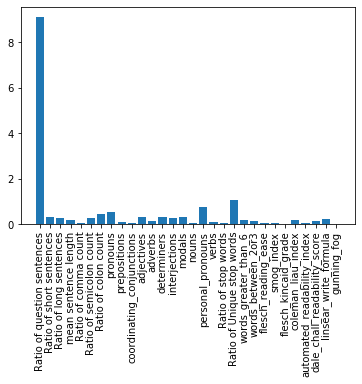

In [56]:
scores = -np.log10(ch2.pvalues_)
plt.bar(range(len(col)), scores)
plt.xticks(range(len(col)), col, rotation='vertical')
plt.show()

In [258]:
import lightgbm as lgb
from sklearn.model_selection import  KFold
accuracy_task1_train=[]
accuracy_task1_test=[]
kf = KFold(n_splits=5,shuffle=True)
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'
for train_index, test_index in kf.split(x_train):
   X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
   y_train, y_test = train_y[train_index], train_y[test_index]
   train_data = lgb.Dataset(X_train, label=y_train)
   
   num_round=10
   clf=lgb.train(param, train_data, num_round)
   #Prediction
   y_pred=clf.predict(X_test)
   #convert into binary values
   for i in range(len(X_test)):
       if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
       else:  
           y_pred[i]=0
   
   accuracy_task1_train.append(f1_score(y_pred,y_test))

   y_pred=clf.predict(x_test)
   #convert into binary values
   for i in range(len(x_test)):
       if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
       else:  
           y_pred[i]=0
   
accuracy_task1_test.append(accuracy_score(y_pred,test_y))


  

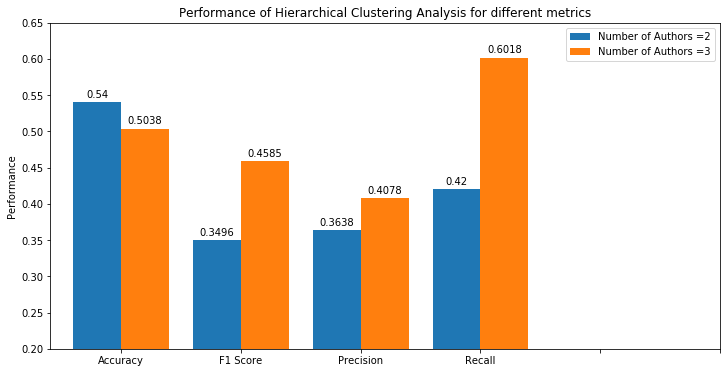

In [302]:
h = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars
#plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()
rects1 = ax.bar(h - width/2, Avg_Score, width, label='Number of Authors =2')
rects2 = ax.bar(h + width/2, Acc_Test, width, label='Number of Authors =3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Performance of Hierarchical Clustering Analysis for different metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(.20,.65)
ax.legend()
def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.rcParams["figure.figsize"] = (12, 6)
plt.show()

In [ ]:
from statistics import mean 
a_rforest=[]
scores_rforest=[]
kf = KFold(n_splits=15,shuffle=True)
for i in range(50):
  print("Done with"+str(i))
  for train_index, test_index in kf.split(x_train):

    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    rforest=RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
    scores_rforest.append(rforest.score(X_test, y_test))
    st_rforest=mean(scores_rforest)
  a_rforest.append(st_rforest)

In [78]:
df_best=df_train[best]

In [80]:
df_best['Multiple Author']=df_train.multiple_Author

<ipython-input-80-fd2e4d41e0d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['Multiple Author']=df_train.multiple_Author


In [81]:
df_best.head()

,Ratio of question sentences,Ratio of short sentences,Ratio of colon count,pronouns,adjectives,determiners,interjections,modals,personal_pronouns,Ratio of Unique stop words,Multiple Author
0,0.019231,0.512821,0.000922,0.010081,0.070565,0.122120,0.000576,0.026210,0.057892,0.029090,0
1,0.048000,0.544000,0.000653,0.018297,0.075056,0.118745,0.000000,0.025392,0.039582,0.035848,1
2,0.079545,0.630682,0.000929,0.013594,0.078448,0.091759,0.000850,0.025489,0.062872,0.027770,0
3,0.056338,0.591549,0.000396,0.011942,0.071653,0.110622,0.000000,0.024513,0.071653,0.052797,1
4,0.012346,0.493827,0.000196,0.016189,0.080481,0.093432,0.000000,0.020352,0.074006,0.044866,1


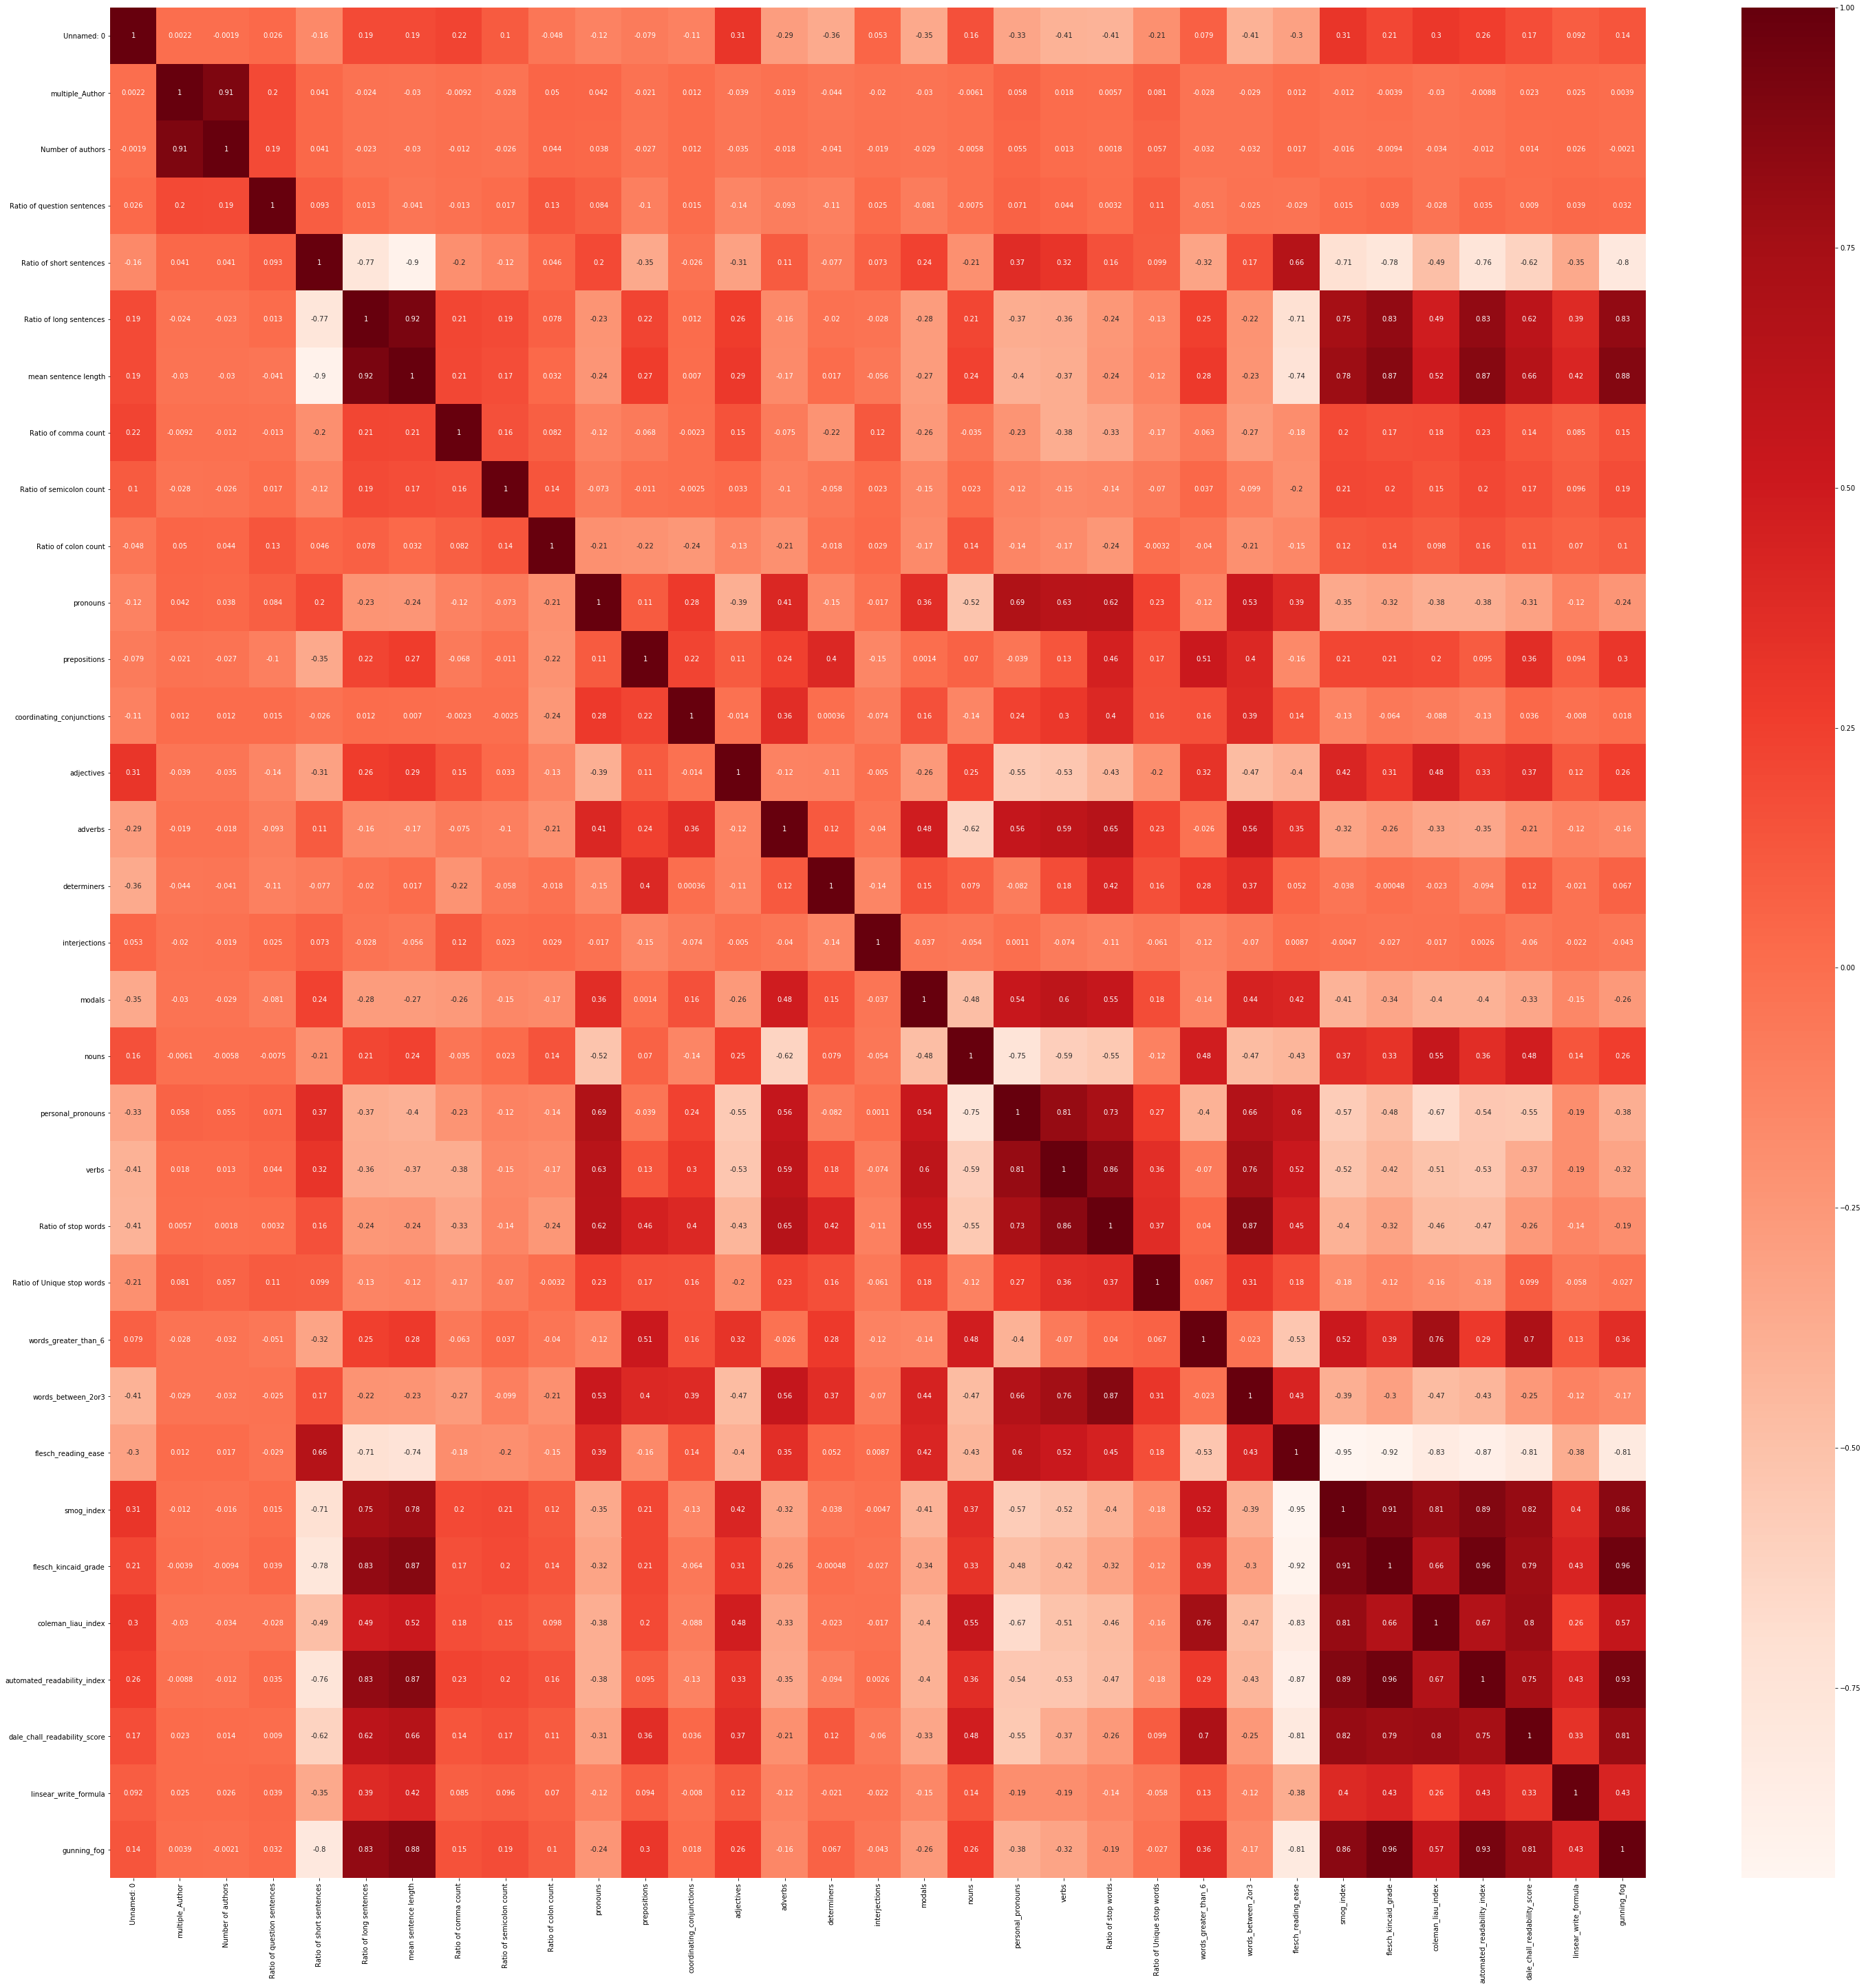

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,50))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
import seaborn as sns
for blah in feat:

  plt.figure()
  sns.FacetGrid(df_task2, hue="Number of Authors") \
    .map(sns.kdeplot, blah) \
    .add_legend()

<Figure size 432x288 with 0 Axes>

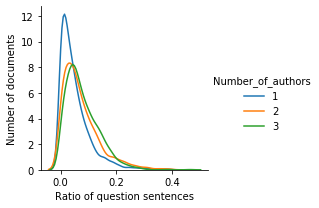

<Figure size 432x288 with 0 Axes>

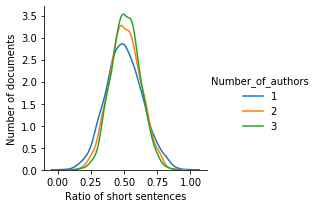

<Figure size 432x288 with 0 Axes>

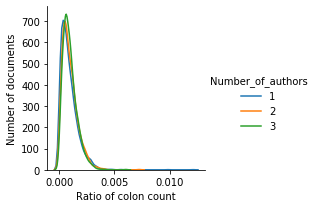

<Figure size 432x288 with 0 Axes>

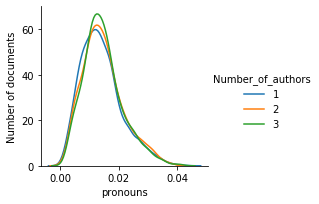

<Figure size 432x288 with 0 Axes>

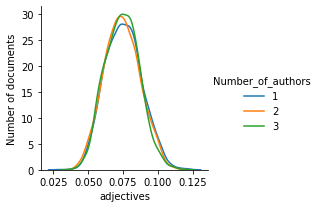

<Figure size 432x288 with 0 Axes>

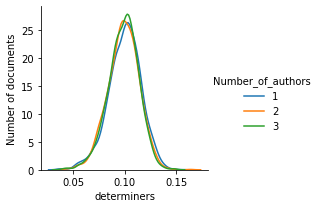

<Figure size 432x288 with 0 Axes>

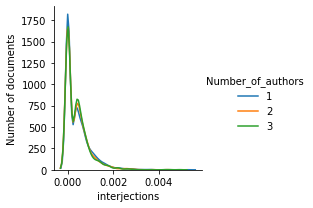

<Figure size 432x288 with 0 Axes>

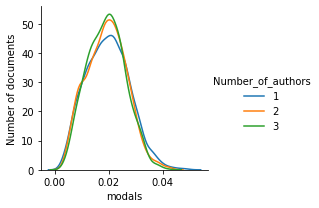

<Figure size 432x288 with 0 Axes>

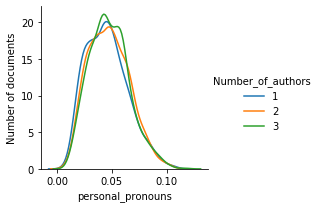

<Figure size 432x288 with 0 Axes>

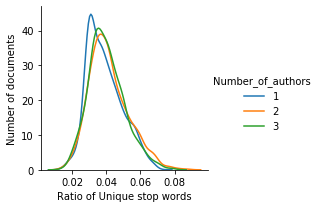

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for name in best:
    plt.figure()
    sns.FacetGrid(df_train, hue="Number_of_authors") \
       .map(sns.kdeplot, name,) \
       .set_axis_labels(name, "Number of documents")\
       .add_legend()

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=df_train[col]
X = df1.values
X=scaler.fit_transform(X)